<a href="https://colab.research.google.com/github/teruyuki-yamasaki/HelloBrax/blob/main/jax0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Learn JAX: From Linear Regression to Neural Networks](https://www.kaggle.com/code/truthr/jax-0)



In this Notebook, you will learn how to work with JAX. There are no theory sections here. Here, you will learn stuff as you need it. Just-in-time learning, if you wish! This Notebook will contain three chapters. In these Notebooks, you will learn how to implement and use algorithms in JAX.

Table of Contents

0. A Brief Introduction to JAX
0.1. Autograd
0.2. XLA
0.3. Composable Transforms
0.4. JIT, or Just-In-Time Compilation
0.5. Getting to Programming with JAX
0.6. The grad method -  
∇
 
1. Linear Regression
1.1. A Toy Example of Linear Regression
1.2. Solving a Real World Problem with Linear Regression
2. Logistic Regression with JAX
2.1. Pseudo Random Numbers in JAX
2.2. Implementing Logistic Regression
2.3. Solving a Problem with Logistic Regression
3. Training a Neural Network with JAX
Where to Go From Here
Citations and References
I will briefly go over the theories, and then their implementations in JAX.





## Chapter 0: A Brief Introduction to JAX
According to the documentation of the project,

JAX is Autograd and XLA, brought together for high-performance numerical computing and machine learning research. It provides composable transformations of Python+NumPy programs: differentiate, vectorize, parallelize, Just-In-Time compile to GPU/TPU, and more.


### Section 0.1: What is Autograd?
Here, Autograd is a specific library. In general, autograd refers to automatic differentiation. In each Deep Learning library, it is essential for the library to calculate the gradients of parameters to be able to backpropagate through them for optimization and update of those parameters to make the model do things that we want. The library that it talks about can automatically differentiate native Python and Numpy code. It can also handle a large subset of Python's features, including loops, ifs, recursion and closures.


### Section 0.2: What is XLA?
XLA (Accelerated Linear Algebra) is a compiler that compiles written code to accelerators such as GPU and TPU without any code change. When a code in any library such as PyTorch, TensorFlow, etc. is run where there are many components to it, the computation graph launches as many kernels. This is inefficient, and slow. Instead, XLA compiles all the code to an accelerator, where it is run very fast.
```
def model_fn(x, y, z):
    return tf.reduce_sum(x + y * z)
```
The above function launches three kernels- one each for the addition, the multiplication, and the reduction. (Code from TensorFlow XLA doc).

In JAX, Autograd and XLA are brought together, so that automatic-differentiation and compilation to GPU/TPU happen together to provide a very sophisticated, easy to use experience for Deep Learning research and development.

### Section 0.3: Composable Transformations
JAX is functional by design. Here, you can one transformation on top of the other very easily. It is common to see code like-

```
grad(jit(grad(jit(grad(np.tanh)))))(1.0)
```

Note that, in the code, the (1.0) is outside of the parens that change the function. The function itself is getting changed, and not the output of one function is being switched to the next in the line. This is why it is called "composable transforms"- the functions themselves get composed.

### Section 0.4: JIT, or Just-In-Time Compilation
JAX provides you with capabilities to Just-In-Time compile specific functions that will be compiled and ran during the runtime, and not before runtime. You might worry about the overhead costs of compiling functions, but Deep Learning libraries are the ideal place for JIT-compiled functions as functions are called many times over the course of training. So, it's basically- compiled once, ran many times. We will see JIT in action throughout this Notebook.

In [1]:
import jax 
import jaxlib 
import jax.numpy as jnp 

In [2]:
x = jnp.arange(5) 
print(x) 

[0 1 2 3 4]


In [3]:
x

DeviceArray([0, 1, 2, 3, 4], dtype=int32)

In [4]:
x, type(x)

(DeviceArray([0, 1, 2, 3, 4], dtype=int32), jaxlib.xla_extension.DeviceArray)

### Section 0.6: The `grad` method -  
∇
 
Here we see a JAX function for the first time. As we have seen in Section 0.3, JAX allows you change functions. jax.grad is a function that takes a numerical function written in Python, and then returns a function that computes the gradient of the original function. Yes, the function gets changed. We are dealing with higher order funtions here. This might be weird to many, but to anyone who has calculated differentials by hand, this is really natural.

In PyTorch, the differentiation of a function is always linked to the data. Differentiation does not mean anything until you calculate it at some point. Let's see how differentiation differs in JAX from PyTorch.

In [5]:
import torch 

tensor_a = torch.arange(1, 25., requires_grad=True) 
tensor_a 

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24.], requires_grad=True)

In [11]:
def sum_of_squares_torch(n: torch.Tensor) -> torch.Tensor:
    return torch.sum(torch.pow(n, 2)) 

In [12]:
b = sum_of_squares_torch(tensor_a) 
b

tensor(4900., grad_fn=<SumBackward0>)

In [9]:
b.backward() 
print(tensor_a.grad) 
print(tensor_a) 

tensor([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26., 28.,
        30., 32., 34., 36., 38., 40., 42., 44., 46., 48.])
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24.], requires_grad=True)


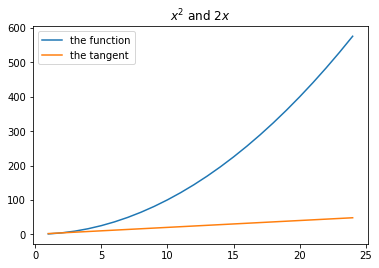

In [10]:
import matplotlib.pyplot as plt 

xs = tensor_a.detach().numpy() 
ys = xs ** 2 
y_dash = 2 * xs

plt.plot(xs, ys, label='the function') 
plt.plot(xs, y_dash, label='the tangent') 
plt.legend() 
plt.title('$x^2$ and $2x$')
plt.show() 

In [13]:
def sum_of_squares_jax(x: jaxlib.xla_extension.DeviceArray) -> jaxlib.xla_extension.DeviceArray:
    return jnp.sum(x ** 2) 

In [14]:
tensor_a = jnp.arange(1, 25.) 
tensor_a

DeviceArray([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
             13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.],            dtype=float32)

In [15]:
sum_of_squares_jax(tensor_a) 

DeviceArray(4900., dtype=float32)

In [16]:
sum_of_squares_dx = jax.grad(sum_of_squares_jax) 

In [18]:
sum_of_squares_dx(tensor_a) 

DeviceArray([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
             26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48.],            dtype=float32)